<a href="https://colab.research.google.com/github/fabiobaroliveira/gerador_base_de_dados/blob/main/vendas_veiculos_seminovos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Necessário instalar biblioteca Faker
! pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.0 MB/s eta 0:00:00


In [25]:
import pandas as pd
import random
from faker import Faker
fake = Faker('pt_BR')

# Listas de valores possíveis
marcas_modelos = {
    "Fiat" : [ "Mobi","Argo", "Cronos", "500e", "Pulse", "Fastback", "Strada", "Toro", "Fiorino"],
    "Volskwagen" : [ "Up", "Gol", "Voyage", "Saveiro", "Polo", "Virtus", "Nivus", "T-Cross", "Amarok"],
    "Chevrolet" : [ "Onix", "Prisma", "Cruze", "Tracker", "S-10", "TrailBlazer"],
    "Hyundai" : [ "HB20", "HB20S", "Creta", "Tucson"],
    "Honda" : [ "Civic", "HR-V", "City", "Fit", "CR-V"],
    "Toyota" : [ "Etios","Yaris","Corolla", "Camry", "Corolla Cross", "Hilux"],
    "Ford" : [ "Ka", "Ka Sedan", "Ecosport", "Ranger", "Focus", "Territory"],
    "Peugeot" : [ "208" , "308", "2008", "3008", "Partner"],
    "Citroen" : [ "C3", "Aircross", "C4", "C4 Grand Picasso", "Basalt"],
    "Jeep" : [ "Compass", "Renegade", "Wrangler", "Cherokee"]
}

formas_pagamento = ["À vista", "Financiamento", "Consórcio", "Leasing"]
cores = ["Preto", "Branco", "Prata", "Vermelho", "Azul", "Verde", "Cinza"]
sexo_opcoes = ["Masculino", "Feminino"]
vendedores = [fake.name() for _ in range(10)]  # 10 vendedores fictícios
origens_lead = ["Site", "Indicação", "Redes Sociais", "Feira", "Busca Direta", "Outros"]
status_pagamento = ["Pago", "Em Atraso", "Cancelado"]  # Para vendas financiadas
nps_opcoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Escala NPS (0-10)

# Função para gerar pesos aleatórios
def gerar_pesos_aleatorios(n):
    pesos = [random.randint(1, 100) for _ in range(n)]  # Gera n pesos aleatórios
    total = sum(pesos)  # Calcula a soma dos pesos
    pesos = [round((p / total) * 100, 2) for p in pesos]  # Normaliza para somar 100
    return pesos

# Gerando pesos aleatórios para marcas
marcas = list(marcas_modelos.keys())
pesos_marcas = gerar_pesos_aleatorios(len(marcas))

# Gerando pesos aleatórios para formas de pagamento
pesos_formas_pagamento = gerar_pesos_aleatorios(len(formas_pagamento))

# Gerando pesos aleatórios para cores
pesos_cores = gerar_pesos_aleatorios(len(cores))

# Gerando pesos aleatórios para sexo
pesos_sexo = gerar_pesos_aleatorios(len(sexo_opcoes))

# Gerando os dados fictícios
dados = []

for i in range(1, 10951):
    sexo = random.choices(sexo_opcoes, weights=pesos_sexo, k=1)[0]
    nome = fake.first_name_male() if sexo == "Masculino" else fake.first_name_female()
    sobrenome = fake.last_name()
    nome_completo = f"{nome} {sobrenome}"
    idade = random.randint(18, 70)
    cpf = fake.cpf()
    estado_civil = fake.random_element(elements=('Solteiro', 'Casado', 'Divorciado', 'Viúvo'))
    email = fake.email()
    telefone = fake.phone_number()
    cidade = fake.city()
    estado = fake.state_abbr()

    # Dados caracteristicos do veículo com base nos pesos aleatórios
    marca = random.choices(marcas, weights=pesos_marcas, k=1)[0]
    modelo = random.choice(marcas_modelos[marca])
    ano_fabricacao = random.randint(2013, 2023)
    cor = random.choices(cores, weights=pesos_cores, k=1)[0]

    # Dados financeiros do veículo com base nos pesos aleatórios
    valor_venda = round(random.uniform(30000, 250000), 2)
    custo_aquisicao = round(random.uniform(0.7, 0.9) * valor_venda, 2)  # 70-90% do valor_venda
    custo_reparos = round(random.uniform(500, 10000), 2) if random.random() > 0.3 else 0  # 70% dos carros têm reparos
    data_venda = fake.date_between(start_date="-8y", end_date="today")
    lucro = valor_venda - custo_aquisicao - custo_reparos

    # Datas (estoque e venda)
    data_venda = fake.date_between(start_date="-1y", end_date="today")
    data_entrada_estoque = fake.date_between(start_date="-2y", end_date=data_venda)
    dias_estoque = (data_venda - data_entrada_estoque).days

    # Dados pagamentos
    forma_pagamento = random.choices(formas_pagamento, weights=pesos_formas_pagamento, k=1)[0]
    status_pagamento_final = "Pago" if forma_pagamento == "À vista" else random.choice(status_pagamento)

    # Time comercial
    vendedor = random.choice(vendedores)
    origem_lead = random.choices(origens_lead, weights=gerar_pesos_aleatorios(len(origens_lead)), k=1)[0]
    nps_cliente = random.choices(nps_opcoes, weights=gerar_pesos_aleatorios(len(nps_opcoes)), k=1)[0]

    dados.append([
        i, nome_completo, idade, cpf, sexo, estado_civil, email, telefone, cidade, estado,
        marca, modelo, ano_fabricacao, cor, valor_venda, data_venda, forma_pagamento,
        custo_aquisicao, custo_reparos, lucro, data_entrada_estoque, dias_estoque,
        vendedor, origem_lead, nps_cliente, status_pagamento_final
    ])

# Criando o DataFrame
colunas = [
    "ID", "Nome Completo", "Idade", "CPF", "Sexo", "Estado Civil", "E-mail", "Telefone",
    "Cidade", "Estado", "Marca", "Modelo", "Ano_fabricacao", "Cor", "Valor_venda",
    "Data_venda", "Forma_pagamento", "Custo_aquisicao", "Custo_reparos", "Lucro",
    "Data_entrada_estoque", "Dias_estoque", "Vendedor", "Origem_lead", "NPS_cliente",
    "Status_pagamento"
]

df_vendas = pd.DataFrame(dados, columns=colunas)

#Substituindo . dos valores e ajustando ao padrão brasileiro
df_vendas['Valor_venda'] = df_vendas['Valor_venda'].astype(str).str.replace('.', ',')
df_vendas['Custo_aquisicao'] = df_vendas['Custo_aquisicao'].astype(float).astype(str).str.replace('.', ',')
df_vendas['Custo_reparos'] = df_vendas['Custo_reparos'].astype(str).str.replace('.', ',')
df_vendas['Lucro'] = df_vendas['Lucro'].astype(str).str.replace('.', ',')

# Exibindo as primeiras linhas do DataFrame
df_vendas.head()

,ID,Nome Completo,Idade,CPF,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,...,Forma_pagamento,Custo_aquisicao,Custo_reparos,Lucro,Data_entrada_estoque,Dias_estoque,Vendedor,Origem_lead,NPS_cliente,Status_pagamento
0,1,Olívia Novaes,22,268.173.459-28,Feminino,Viúvo,isabel59@example.net,+55 (084) 2590-4588,Vieira Paulista,GO,...,Financiamento,"164733,39","7966,87","10943,809999999994",2024-06-17,177,Luana Santos,Indicação,7,Em Atraso
1,2,Gustavo Almeida,33,091.476.582-58,Masculino,Divorciado,caua74@example.org,+55 (071) 3563-7634,Araújo,SP,...,À vista,"82047,86","3548,8","5624,789999999996",2024-05-25,177,Sara Pinto,Redes Sociais,9,Pago
2,3,Catarina Carvalho,30,257.309.618-12,Feminino,Casado,nathan19@example.org,31 8409 5091,Cavalcante,DF,...,Financiamento,"109726,62","8351,4","18899,710000000014",2024-05-16,15,Luana Santos,Outros,4,Pago
3,4,Zoe Câmara,32,059.134.268-51,Feminino,Divorciado,milena40@example.com,(031) 9211-4838,Aparecida do Norte,SP,...,Financiamento,"165562,9","0,0","55886,080000000016",2024-06-25,17,Sara Pinto,Busca Direta,5,Em Atraso
4,5,Hellena Farias,63,063.459.718-39,Feminino,Viúvo,guilherme86@example.com,(061) 2184-3459,Vargas,RR,...,Financiamento,"40015,59","5860,78","-292,3399999999974",2023-05-01,576,Luna Lima,Redes Sociais,9,Cancelado


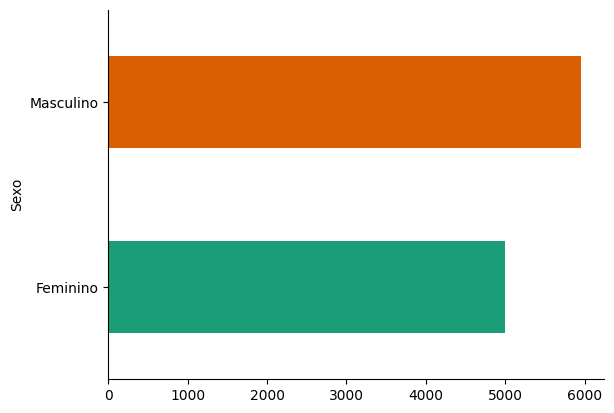

In [26]:
# @title Gráfico para Vizualização de Divisão por Sexo

from matplotlib import pyplot as plt
import seaborn as sns

df_vendas.groupby("Sexo").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

plt.gca().spines[["top", "right",]].set_visible(False)

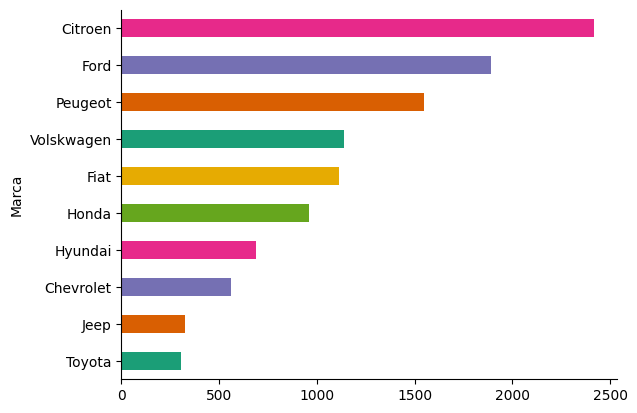

In [27]:
# @title Gráfico para Vizualização de Divisão de Vendas por Marca

from matplotlib import pyplot as plt
import seaborn as sns

# Coloca em ordem crescente
(df_vendas.groupby("Marca").size().sort_values().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2")))

# Remove bordas desnecessárias
plt.gca().spines[['top', 'right']].set_visible(False)

In [28]:
from google.colab import files

# Cria arquivos .csv com o separador ;
df_vendas.to_csv('vendas_loja_seminovos.csv', index=False, sep=';')

# Faz o download dos arquivos
files.download('vendas_loja_seminovos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>